In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
times_list = [str(1800 * (i + 1)) for i in range(12)]
# times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [7]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + 'more_detail_2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                     index_col=0,
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _name, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                df = df / df.sum().sum()
                df = df.sort_index(ascending=False)
                csv_array[_dir][_seed][_csv][_name] = df

In [8]:
# for _dir in dir_list:
#     for _seed in seed_list:
#         for _csv in ['census']:
#             for _times in times_list:
#                 csv_array[_dir][_seed][_csv][_times].to_csv('countor3d_per_times/'+_dir+'seed'+_seed+'_'+_csv+_times+'.csv')

In [9]:
def create_contour(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)

In [10]:
people = 'people10000'
seed = '123'
csv = 'census'

# コンター図

1800


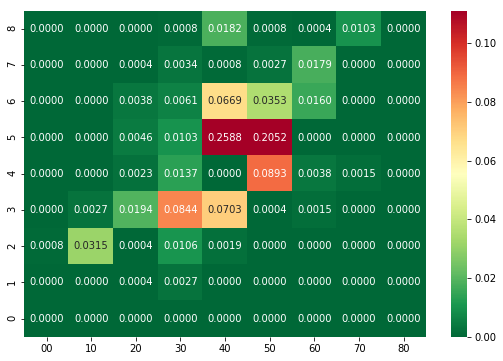

In [11]:
time = times_list[0]
print(time)
create_contour(csv_array[people][seed][csv][time])

3600


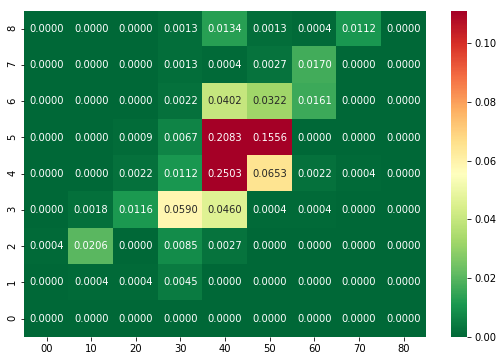

In [12]:
time = times_list[1]
print(time)
create_contour(csv_array[people][seed][csv][time])

5400


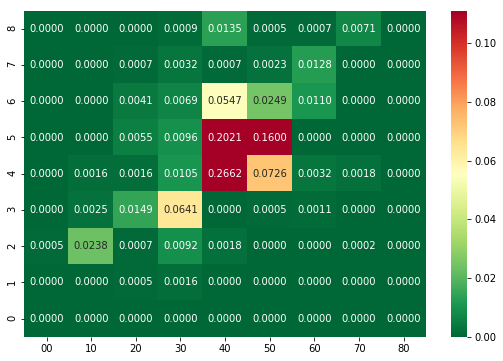

In [13]:
time = times_list[2]
print(time)
create_contour(csv_array[people][seed][csv][time])

7200


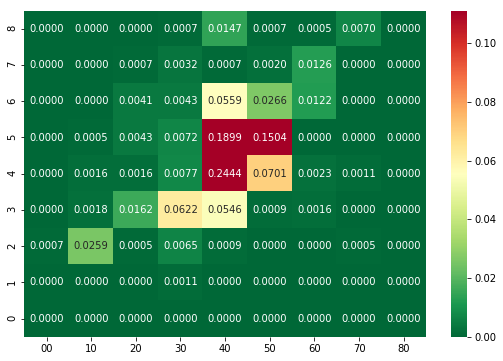

In [14]:
time = times_list[3]
print(time)
create_contour(csv_array[people][seed][csv][time])

9000


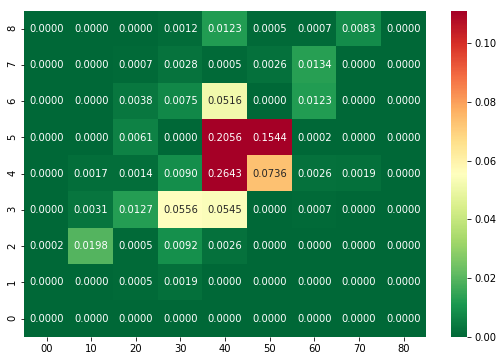

In [15]:
time = times_list[4]
print(time)
create_contour(csv_array[people][seed][csv][time])

10800


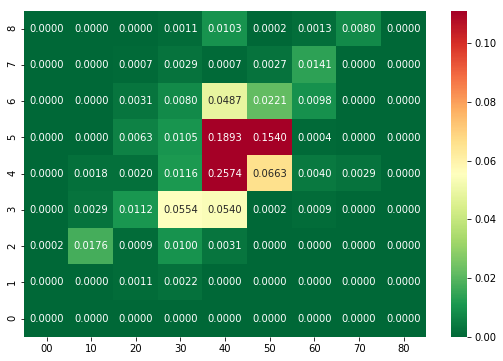

In [16]:
time = times_list[5]
print(time)
create_contour(csv_array[people][seed][csv][time])

12600


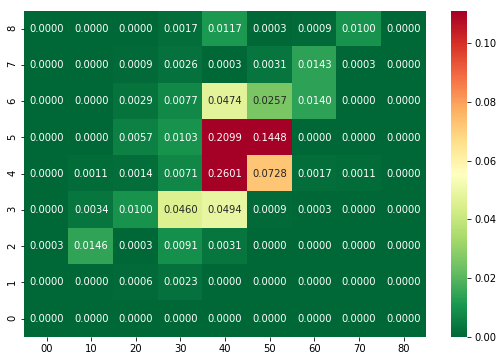

In [17]:
time = times_list[6]
print(time)
create_contour(csv_array[people][seed][csv][time])

14400


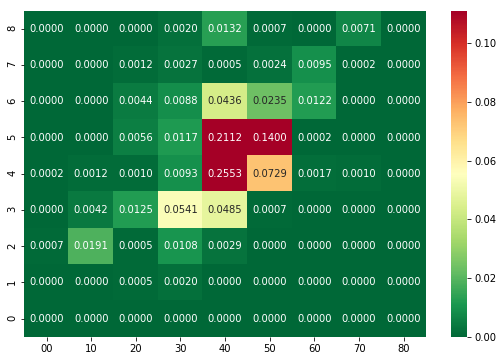

In [18]:
time = times_list[7]
print(time)
create_contour(csv_array[people][seed][csv][time])

16200


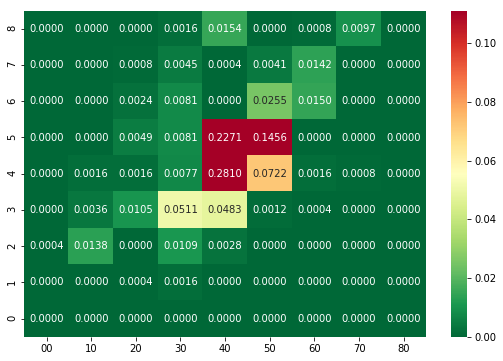

In [19]:
time = times_list[8]
print(time)
create_contour(csv_array[people][seed][csv][time])

18000


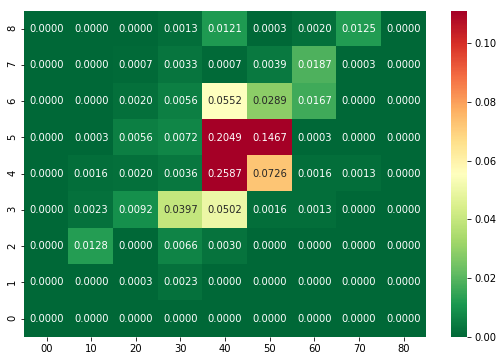

In [20]:
time = times_list[9]
print(time)
create_contour(csv_array[people][seed][csv][time])

19800


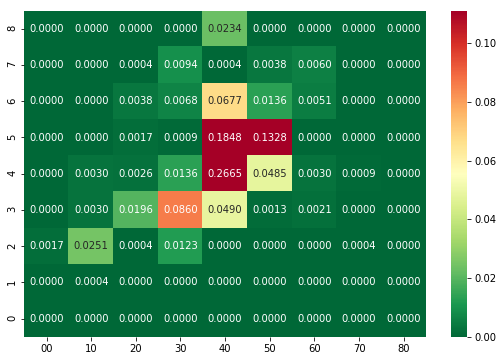

In [21]:
time = times_list[10]
print(time)
create_contour(csv_array[people][seed][csv][time])

21600


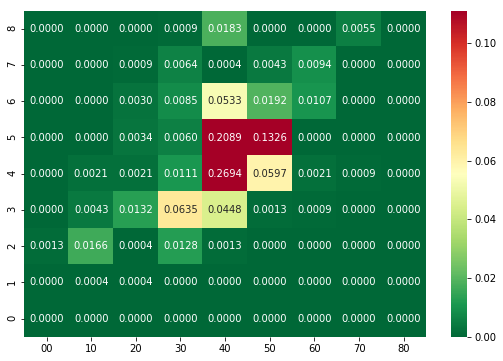

In [22]:
time = times_list[11]
print(time)
create_contour(csv_array[people][seed][csv][time])

# 1時間前とのdiff

In [23]:
def apply_percentage(df, sum_per_time):
    df_new = pd.DataFrame()
    for row in np.asanyarray(df):
        row[2] /= sum_per_time[row[0]]
        df_new = pd.concat([df_new, pd.DataFrame(row).T])
    return df_new

In [24]:
base = create_base_dataframe()

csv_array_diff = {}
for _dir in dir_list:
    csv_array_diff[_dir] = {}
    for _seed in seed_list:
        csv_array_diff[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + 'more_detail_2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                     index_col=0,
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            sum_per_time = df.groupby(['time'], sort=False)['people'].sum()
            df = apply_percentage(df, sum_per_time)
            df.columns =['time', 'area', 'people']
            
            group_list = df.groupby(['time'], sort=False)
            for _name, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                if _name != times_list[0]:
                    diff = str(int(_name) - int(times_list[0]))
                    df /= csv_array[_dir][_seed][_csv][diff]
                df = df.sort_index(ascending=False)
                df = df.replace(np.inf,np.nan).fillna(0)
#                 df = df.style.background_gradient(cmap='RdYlGn_r')
                csv_array_diff[_dir][_seed][_csv][_name] = df

In [25]:
def create_contour_diff(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0.5)

1800


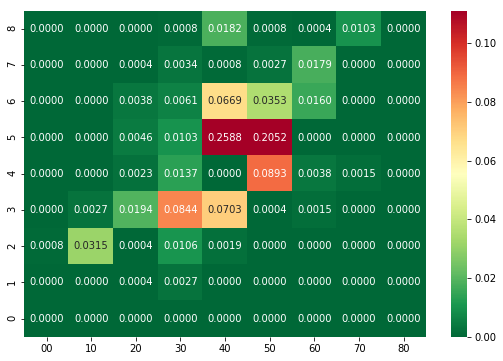

In [26]:
time = times_list[0]
print(time)
create_contour(csv_array_diff[people][seed][csv][time])

3600


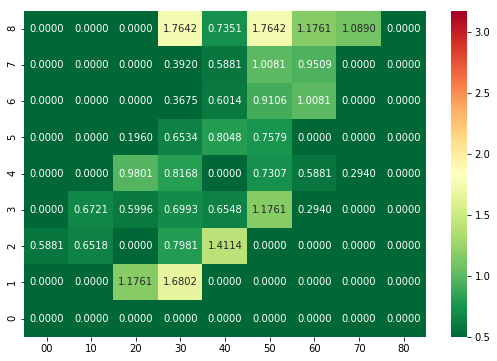

In [27]:
time = times_list[1]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

5400


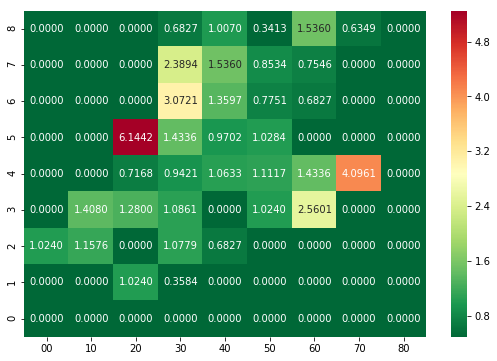

In [28]:
time = times_list[2]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

7200


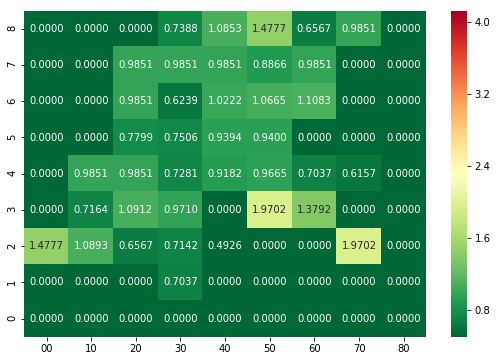

In [29]:
time = times_list[3]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

9000


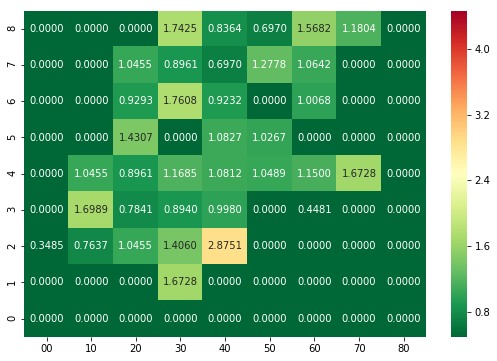

In [30]:
time = times_list[4]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

10800


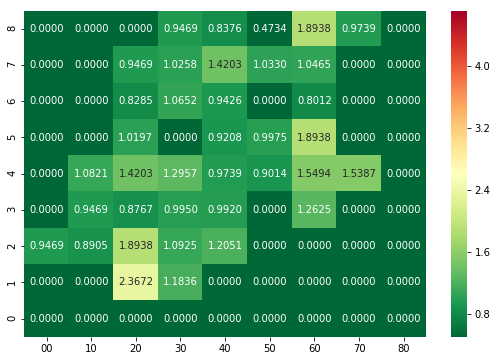

In [31]:
time = times_list[5]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

12600


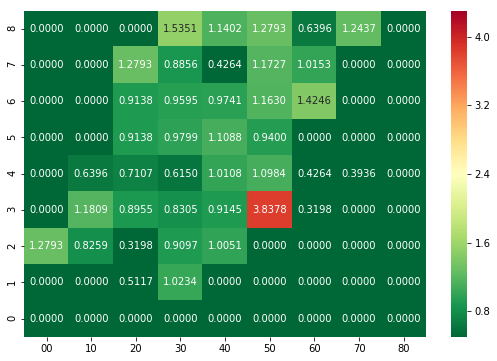

In [32]:
time = times_list[6]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

14400


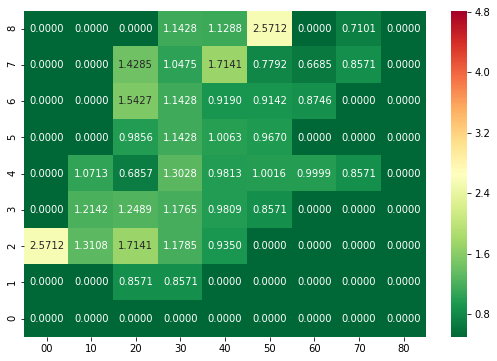

In [33]:
time = times_list[7]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

16200


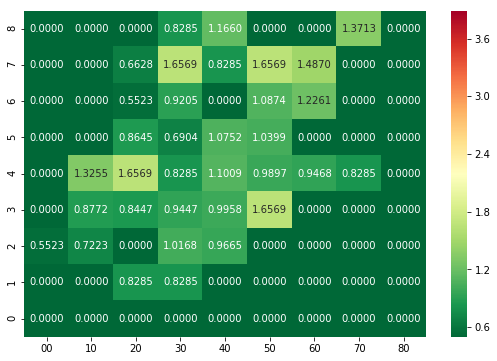

In [34]:
time = times_list[8]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

18000


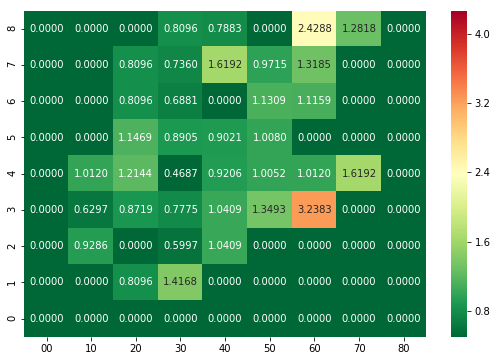

In [35]:
time = times_list[9]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

19800


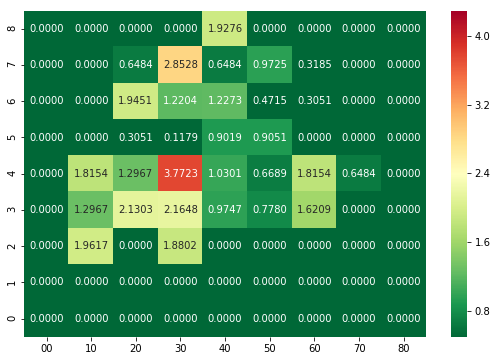

In [36]:
time = times_list[10]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

21600


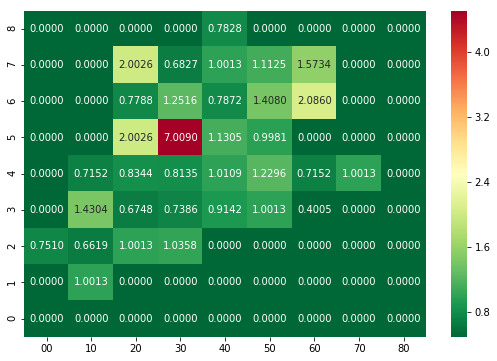

In [37]:
time = times_list[11]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])